# 16 febbraio 2023

azimuth parabola: 265

azimuth vero: 260

ora inizio parabola: 01:00

ora fine parabola: 03:52

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

In [2]:
azimuth_min =  264.9
azimuth_max = 265.1

data_i = pd.to_datetime('2023-02-16 01:00:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-02-16 03:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-02-16 04:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '16 febbraio 2023, azimuth: 260'

file_parabola = '../../raccolta_dati/parabola/2023_02_16.txt'
file_ricevitore = '../../raccolta_dati/10GHz/2023-02-15_16.txt'

In [3]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [4]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [5]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [6]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [7]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [8]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [9]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

In [10]:
with open('parabola.txt', 'w') as f: 
    f.write(parabola.to_string(index=False))

with open('ricevitore.txt', 'w') as f: 
    f.write(ricevitore_10.to_string(index=False))

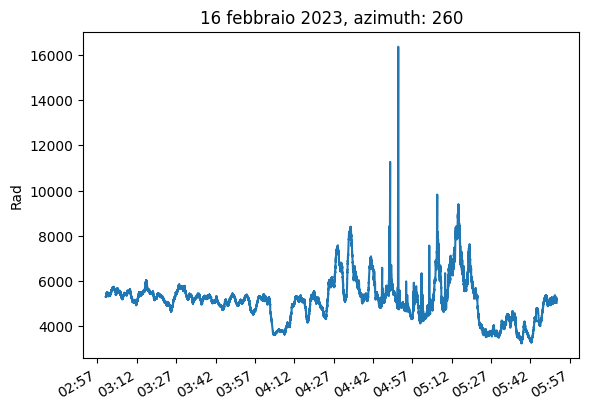

In [11]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [12]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [13]:
with open('dati.txt', 'w') as f:
    file = df.to_string(index=False)
    f.write(file)

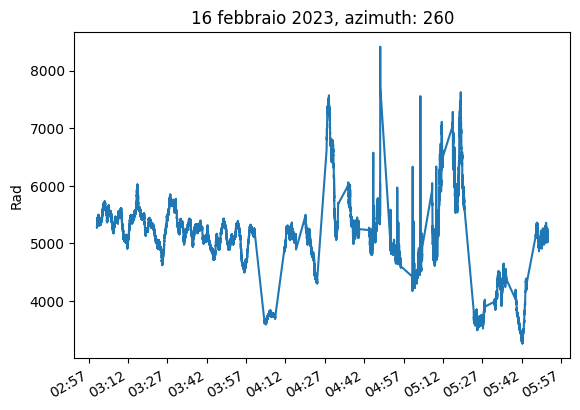

In [14]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(df['data_ora'],df['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

plt.title(title)
plt.ylabel('Rad')
plt.show()

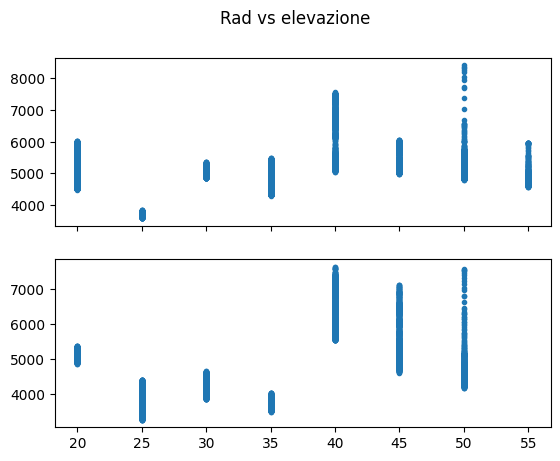

In [15]:
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('Rad vs elevazione')

mask_17 = df.data_ora <= data_m
mask_18 = df.data_ora >= data_m

axs[0].scatter(df['elevazione'][mask_17],df['rad'][mask_17], marker='.', label='temp')
axs[1].scatter(df['elevazione'][mask_18],df['rad'][mask_18], marker='.', label='temp')

plt.show()

Grafici con singola elevazione

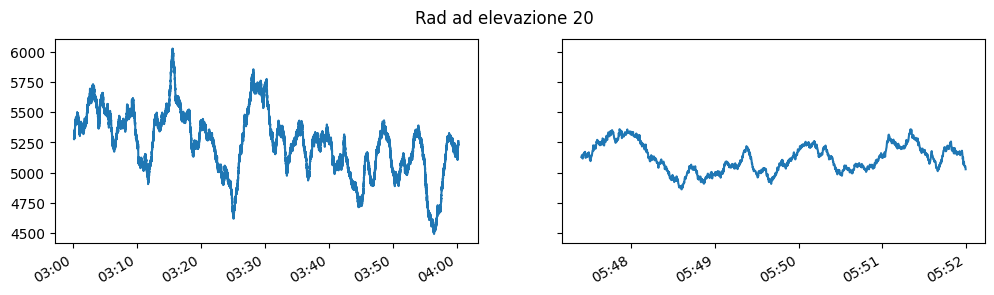

In [16]:
fig_1, axs_1 = plt.subplots(1,2, sharey=True)
fig_1.suptitle('Rad ad elevazione 20')
fig_1.autofmt_xdate()
fig_1.set_size_inches(12, 3)

a_1 = df.data_ora <= data_m
a_2 = df.data_ora >= data_m
a_3 = df.elevazione == 20

axs_1[0].plot(df['data_ora'][a_1 & a_3],df['rad'][a_1 & a_3], label='temp')
axs_1[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_1[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_1[1].plot(df['data_ora'][a_2 & a_3],df['rad'][a_2 & a_3], label='temp')
axs_1[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_1[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

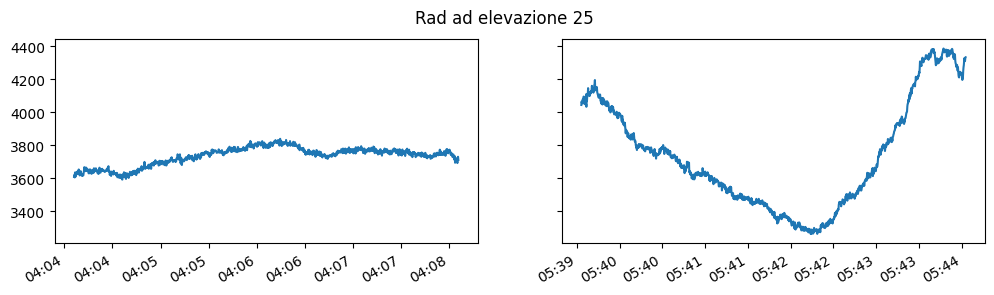

In [17]:
fig_2, axs_2 = plt.subplots(1,2, sharey=True)
fig_2.suptitle('Rad ad elevazione 25')
fig_2.autofmt_xdate()
fig_2.set_size_inches(12, 3)

b_1 = df.data_ora <= data_m
b_2 = df.data_ora >= data_m
b_3 = df.elevazione == 25

axs_2[0].plot(df['data_ora'][b_1 & b_3],df['rad'][b_1 & b_3], label='temp')
axs_2[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_2[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_2[1].plot(df['data_ora'][b_2 & b_3],df['rad'][b_2 & b_3], label='temp')
axs_2[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_2[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

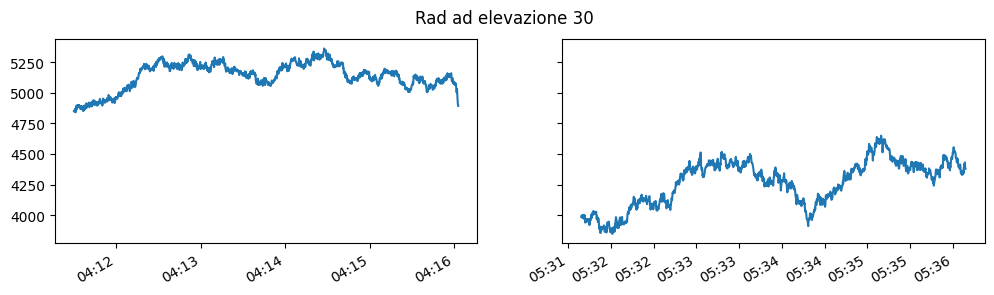

In [18]:
fig_3, axs_3 = plt.subplots(1,2, sharey=True)
fig_3.suptitle('Rad ad elevazione 30')
fig_3.autofmt_xdate()
fig_3.set_size_inches(12, 3)

c_1 = df.data_ora <= data_m
c_2 = df.data_ora >= data_m
c_3 = df.elevazione == 30

axs_3[0].plot(df['data_ora'][c_1 & c_3],df['rad'][c_1 & c_3], label='temp')
axs_3[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_3[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_3[1].plot(df['data_ora'][c_2 & c_3],df['rad'][c_2 & c_3], label='temp')
axs_3[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_3[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

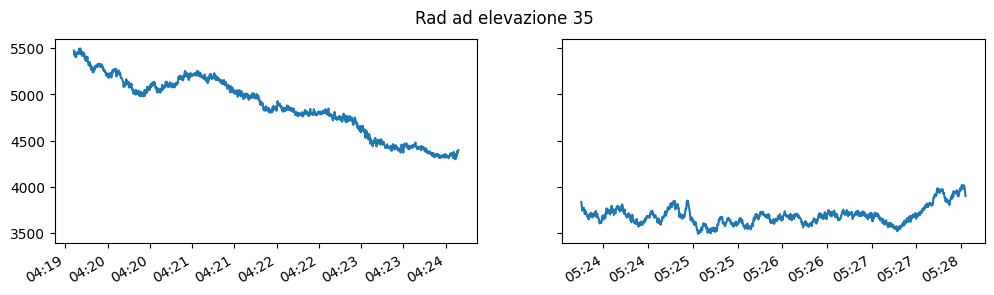

In [19]:
fig_4, axs_4 = plt.subplots(1,2, sharey=True)
fig_4.suptitle('Rad ad elevazione 35')
fig_4.autofmt_xdate()
fig_4.set_size_inches(12, 3)

d_1 = df.data_ora <= data_m
d_2 = df.data_ora >= data_m
d_3 = df.elevazione == 35

axs_4[0].plot(df['data_ora'][d_1 & d_3],df['rad'][d_1 & d_3], label='temp')
axs_4[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_4[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_4[1].plot(df['data_ora'][d_2 & d_3],df['rad'][d_2 & d_3], label='temp')
axs_4[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_4[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

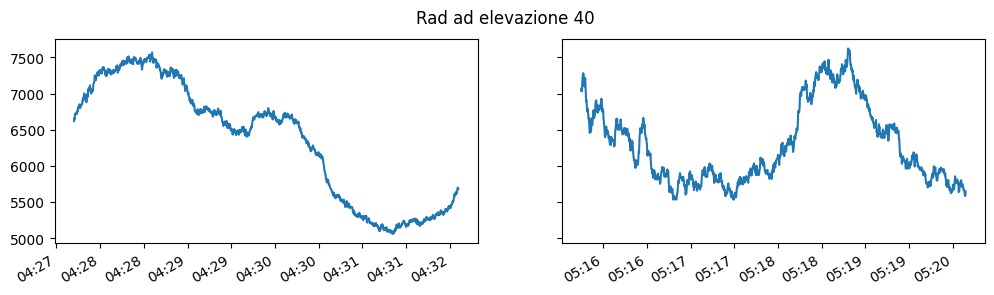

In [20]:
fig_5, axs_5 = plt.subplots(1,2, sharey=True)
fig_5.suptitle('Rad ad elevazione 40')
fig_5.autofmt_xdate()
fig_5.set_size_inches(12, 3)

e_1 = df.data_ora <= data_m
e_2 = df.data_ora >= data_m
e_3 = df.elevazione == 40

axs_5[0].plot(df['data_ora'][e_1 & e_3],df['rad'][e_1 & e_3], label='temp')
axs_5[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_5[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_5[1].plot(df['data_ora'][e_2 & e_3],df['rad'][e_2 & e_3], label='temp')
axs_5[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_5[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

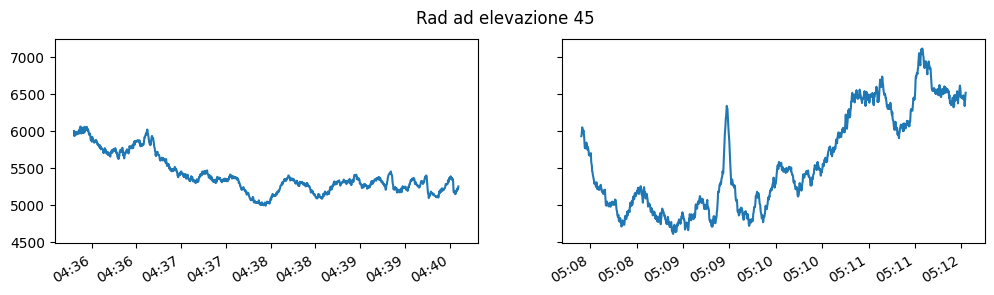

In [21]:
fig_6, axs_6 = plt.subplots(1,2, sharey=True)
fig_6.suptitle('Rad ad elevazione 45')
fig_6.autofmt_xdate()
fig_6.set_size_inches(12, 3)

f_1 = df.data_ora <= data_m
f_2 = df.data_ora >= data_m
f_3 = df.elevazione == 45

axs_6[0].plot(df['data_ora'][f_1 & f_3],df['rad'][f_1 & f_3], label='temp')
axs_6[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_6[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_6[1].plot(df['data_ora'][f_2 & f_3],df['rad'][f_2 & f_3], label='temp')
axs_6[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_6[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

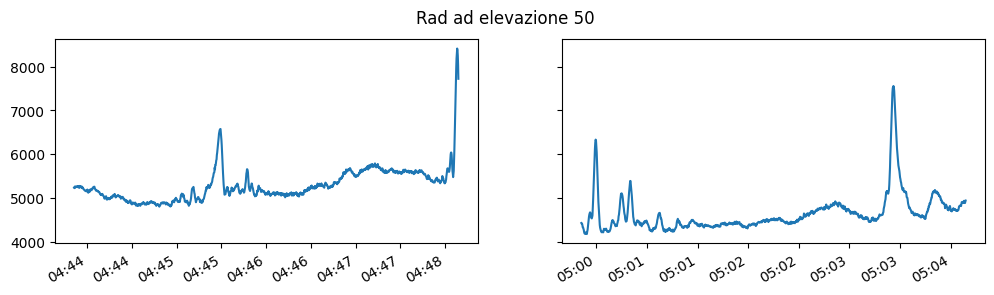

In [22]:
fig_7, axs_7 = plt.subplots(1,2, sharey=True)
fig_7.suptitle('Rad ad elevazione 50')
fig_7.autofmt_xdate()
fig_7.set_size_inches(12, 3)

g_1 = df.data_ora <= data_m
g_2 = df.data_ora >= data_m
g_3 = df.elevazione == 50

axs_7[0].plot(df['data_ora'][g_1 & g_3],df['rad'][g_1 & g_3], label='temp')
axs_7[0].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_7[0].xaxis.set_major_locator(MinuteLocator(interval = 1))

axs_7[1].plot(df['data_ora'][g_2 & g_3],df['rad'][g_2 & g_3], label='temp')
axs_7[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
# axs_7[1].xaxis.set_major_locator(MinuteLocator(interval = 1))

plt.show()

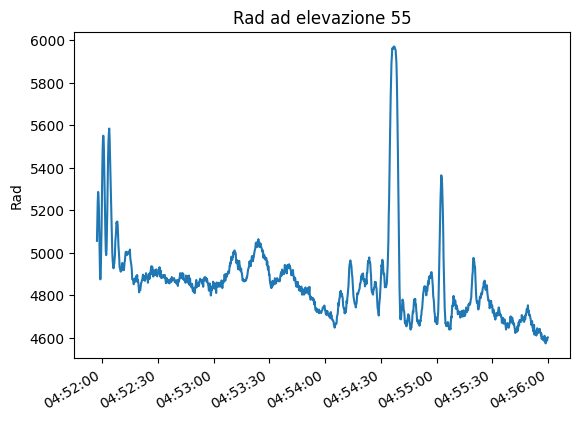

In [23]:
fig_9, ax_8 = plt.subplots()
fig_9.autofmt_xdate()

h = df.elevazione == 55

ax_8.plot(df['data_ora'][h],df['rad'][h], label='temp')
ax_8.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
# ax_8.xaxis.set_major_locator(SecondLocator(interval = 30))

plt.title('Rad ad elevazione 55')
plt.ylabel('Rad')
plt.show()